<a href="https://colab.research.google.com/github/fergallocruz/DataScienceTools/blob/main/ECID_HAD_2022_1_04_5_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones
Resuelve los ejercicios que viene a continuación utilizando los datos descritos en:
[https://corgis-edu.github.io/corgis/csv/broadway/](https://corgis-edu.github.io/corgis/csv/broadway/)


In [ ]:
!wget https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/broadway.csv
import csv
f=open("broadway.csv")
data=list(csv.reader(f))
headers=data[0]
data=data[1:]
headers

--2021-10-02 13:10:15--  https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/broadway.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3094890 (3.0M) [text/plain]
Saving to: ‘broadway.csv.1’

broadway.csv.1      100%[===================>]   2.95M  --.-KB/s    in 0.08s   

2021-10-02 13:10:15 (35.2 MB/s) - ‘broadway.csv.1’ saved [3094890/3094890]



['Date.Day',
 'Date.Full',
 'Date.Month',
 'Date.Year',
 'Show.Name',
 'Show.Theatre',
 'Show.Type',
 'Statistics.Attendance',
 'Statistics.Capacity',
 'Statistics.Gross',
 'Statistics.Gross Potential',
 'Statistics.Performances']

1. Organiza tus datos

In [ ]:
# shows
import csv
shows = []
show_names = []
for s in data:
  show = dict()
  for h, v in zip(headers, s):
    show[h] = v
  shows.append(show)
  show_names.append(show['Show.Name'])
shows


[{'Date.Day': '26',
  'Date.Full': '8/26/1990',
  'Date.Month': '8',
  'Date.Year': '1990',
  'Show.Name': 'Tru',
  'Show.Theatre': 'Booth',
  'Show.Type': 'Play',
  'Statistics.Attendance': '5500',
  'Statistics.Capacity': '88',
  'Statistics.Gross': '134456',
  'Statistics.Gross Potential': '0',
  'Statistics.Performances': '8'},
 {'Date.Day': '24',
  'Date.Full': '3/24/1991',
  'Date.Month': '3',
  'Date.Year': '1991',
  'Show.Name': 'Miss Saigon',
  'Show.Theatre': 'Broadway',
  'Show.Type': 'Musical',
  'Statistics.Attendance': '1737',
  'Statistics.Capacity': '100',
  'Statistics.Gross': '100647',
  'Statistics.Gross Potential': '0',
  'Statistics.Performances': '0'},
 {'Date.Day': '31',
  'Date.Full': '3/31/1991',
  'Date.Month': '3',
  'Date.Year': '1991',
  'Show.Name': 'Miss Saigon',
  'Show.Theatre': 'Broadway',
  'Show.Type': 'Musical',
  'Statistics.Attendance': '12160',
  'Statistics.Capacity': '100',
  'Statistics.Gross': '634424',
  'Statistics.Gross Potential': '0',
  

1. Crea una lista de todas las obras que aparecen y cuéntalas.

In [ ]:
show_names = set(show_names)
len(show_names)

820

1. Cuenta el número de personas que atendieron cada obra a través de todos los años con ayuda de un diccionario

In [ ]:
show_attendance = dict()
for s in show_names:
  show_attendance[s] = 0
show_attendance

for s in shows:
  show_attendance[s['Show.Name']] += int(s['Statistics.Attendance'])

show_attendance

1. Encuentra las 20 obras con más público

In [ ]:
attendance_rank = sorted(show_attendance.items(), key = lambda kv:(kv[1], kv[0]))
c=0
top_20 = attendance_rank[-20:]
top_20_names = []
for t in reversed(top_20):
  c+=1
  top_20_names.append(t[0])
  print(f'{c}) {t[0]} had {t[1]} people going to watch the show.')
top_20_names = set(top_20_names)

1) The Lion King had 13207871 people going to watch the show.
2) The Phantom Of The Opera had 11582362 people going to watch the show.
3) Wicked had 9524462 people going to watch the show.
4) Chicago had 8123328 people going to watch the show.
5) Beauty And The Beast had 7609397 people going to watch the show.
6) Mamma Mia! had 7566124 people going to watch the show.
7) Miss Saigon had 5843972 people going to watch the show.
8) Jersey Boys had 4971699 people going to watch the show.
9) Rent had 4969873 people going to watch the show.
10) Mary Poppins had 3878444 people going to watch the show.
11) The Producers had 3672795 people going to watch the show.
12) Les Miserables had 3466401 people going to watch the show.
13) Hairspray had 3418653 people going to watch the show.
14) Aida had 2714193 people going to watch the show.
15) The Book Of Mormon had 2497551 people going to watch the show.
16) Cats had 2290852 people going to watch the show.
17) 42Nd Street '01 had 2199186 people goin

## Genera las siguientes gráficas:

1. Para cada una de las 20 obras más populares, genera una gráfica que represente de la mejor manera los cambios en la cantidad de público año por año.

<Figure size 432x288 with 0 Axes>

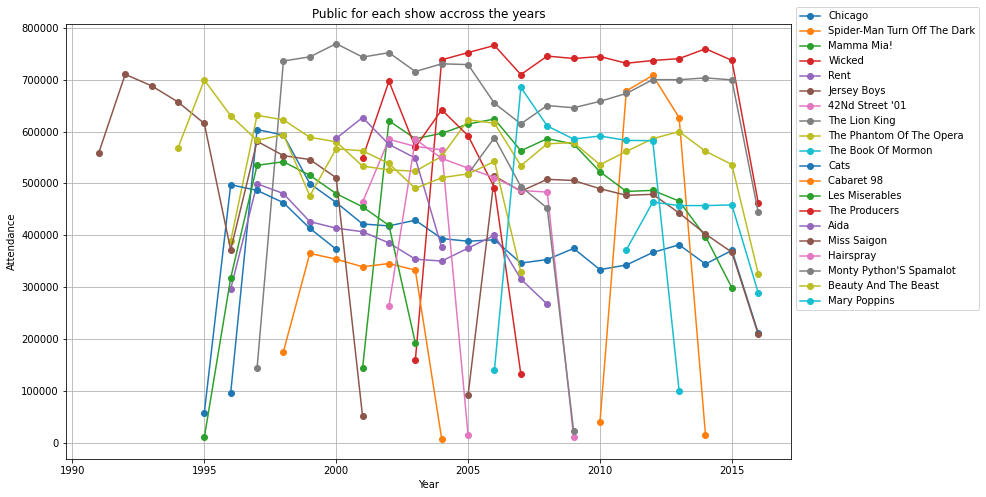

In [ ]:
import matplotlib.pyplot as plt

show_info = dict()
show_totals = dict()
for n in top_20_names:
  show_info[n] = dict()
  show_totals[n] = dict()
for s in shows:
  if(s['Show.Name'] in top_20_names):
    year = int(s['Date.Year'])
    if (year in show_info[s['Show.Name']].keys()):
      show_info[s['Show.Name']][year] += int(s['Statistics.Attendance'])
      show_totals[s['Show.Name']] += int(s['Statistics.Attendance'])
    else:
      show_info[s['Show.Name']][year] = int(s['Statistics.Attendance'])
      show_totals[s['Show.Name']]= int(s['Statistics.Attendance'])

fig = plt.figure()
plt.figure(figsize=[13,8])

for label in show_info:
  y_a = show_info[label]
  l_years = []
  l_attendance = []
  for y in y_a:
    l_years.append(y)
    l_attendance.append(y_a[y])
  plt.plot(l_years, l_attendance, '-' ,marker='o',label=label)

plt.legend(bbox_to_anchor=(1, 1.05))
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.title('Public for each show accross the years')
plt.grid(True)

plt.show()

2. Para las 5 obras más populares, genera una gráfica que compare de la mejor manera la cantidad de público total entre ellas.

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# top 5
top_rank = sorted(show_totals.items(), key = lambda kv:(kv[1], kv[0]))
objects = [i[0] for i in reversed(top_rank[-5:])]
y_pos = np.arange(len(objects))
performance = [i[1] for i in reversed(top_rank[-5:])]

plt.barh(y_pos, performance, align='center', alpha=0.5, color=mcolors.TABLEAU_COLORS)
plt.yticks(y_pos, objects)
plt.xlabel('Audience through the years')
plt.title('Broadway top 5 audience rank')
plt.grid(True)
plt.show()

TypeError: ignored

3. Para la obra de Mary Poppins, genera una gráfica en la que se pueda comparar la asistencia a la obra en los diferentes meses del año.

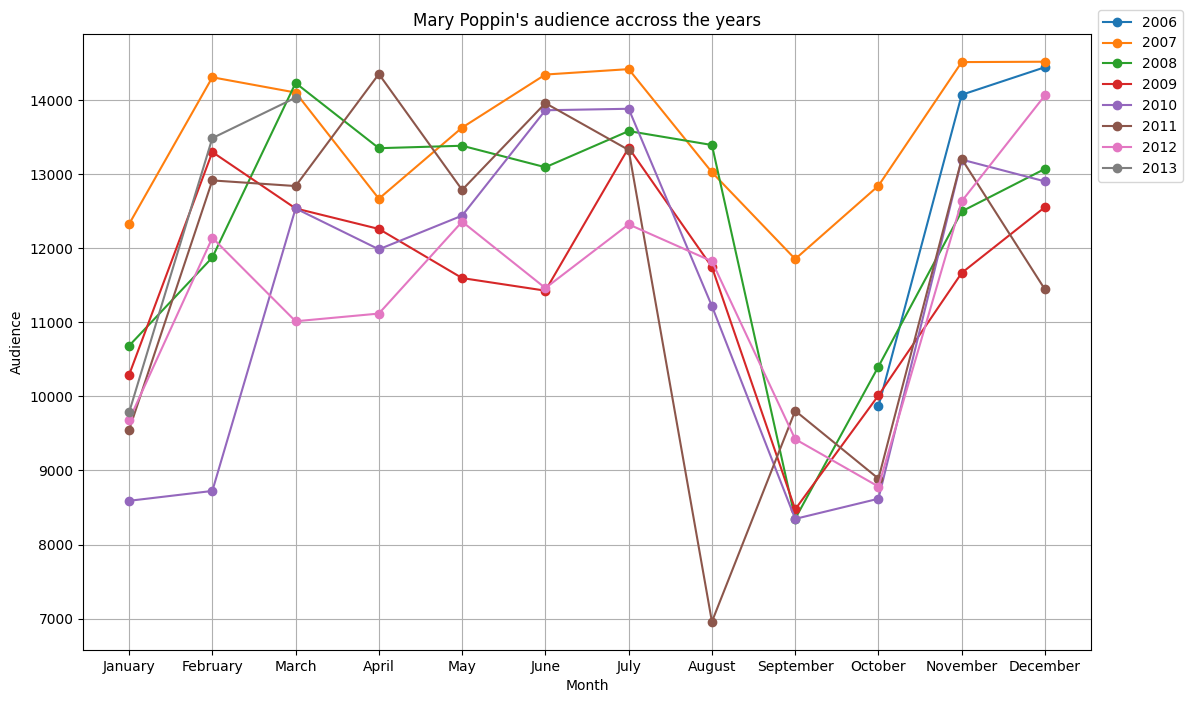

In [ ]:
import numpy as np
mary_poppins = dict()
months = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December',
}

labels = []
plt.figure(figsize=[13,8])
for s in shows:
  if(s['Show.Name'] == 'Mary Poppins'):
    year = int(s['Date.Year'])
    month = int(s['Date.Month'])
    att = int(s['Statistics.Attendance'])
    if (year in mary_poppins.keys()):
      if (year in mary_poppins[year].keys()):
        mary_poppins[year][month] += att
      else:
        mary_poppins[year][month] = att
        labels.append(year)
    else:
      mary_poppins[year] = dict()

for y in mary_poppins:
  audiences = []
  month = []
  for m in mary_poppins[y]:
    audiences.append(mary_poppins[y][m])
    month.append(m)
  plt.plot(month, audiences, label=year, marker='o')
labels = set(labels)
plt.xlabel('Month')
plt.ylabel('Audience')
plt.title('Mary Poppin\'s audience accross the years')
plt.xticks(np.arange(1,13,1), [months[m] for m in months])
plt.legend(labels, bbox_to_anchor=(1, 1.05))
plt.grid(True)

plt.show()

4. Genera una gráfica a tu elección que demuestre el comportamiento de alguna otra variable de los datos (tipo de show, teatros donde se presentan, etcétera)

<Figure size 1300x800 with 0 Axes>

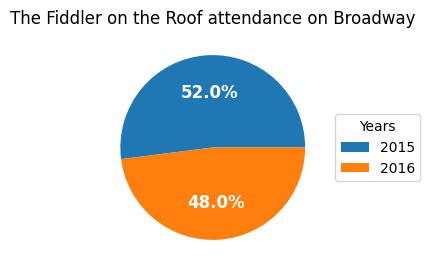

In [ ]:
import statistics

fiddler = dict()
labels = []
plt.figure(figsize=[13,8])

#Statistics.Capacity

for s in shows:
  theatre = s['Show.Theatre']
  showName = s['Show.Name']
  year = s['Date.Year']
  att = int(s['Statistics.Attendance'])
  if ('Fiddler On The Roof' in showName):
    if ('Broadway' == theatre):
      if (year not in fiddler.keys()):
        fiddler[year] = [att]
        labels.append(year)
      else:
        fiddler[year].append(att)

means = []
for f in fiddler:
  means.append( statistics.mean(fiddler[f]))

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    return "{:.1f}%".format(pct)


wedges, texts, autotexts = ax.pie(means, autopct=lambda pct: func(pct, means),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Years",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("The Fiddler on the Roof attendance on Broadway")

plt.show()

Extra: Para la obra de Cats, genera una gráfica en la que se aprecie de la mejor manera, una comparativa sobre la cantidad de semanas en que se lograron llenar el teatro a diferentes capacidades.

<Figure size 1300x800 with 0 Axes>

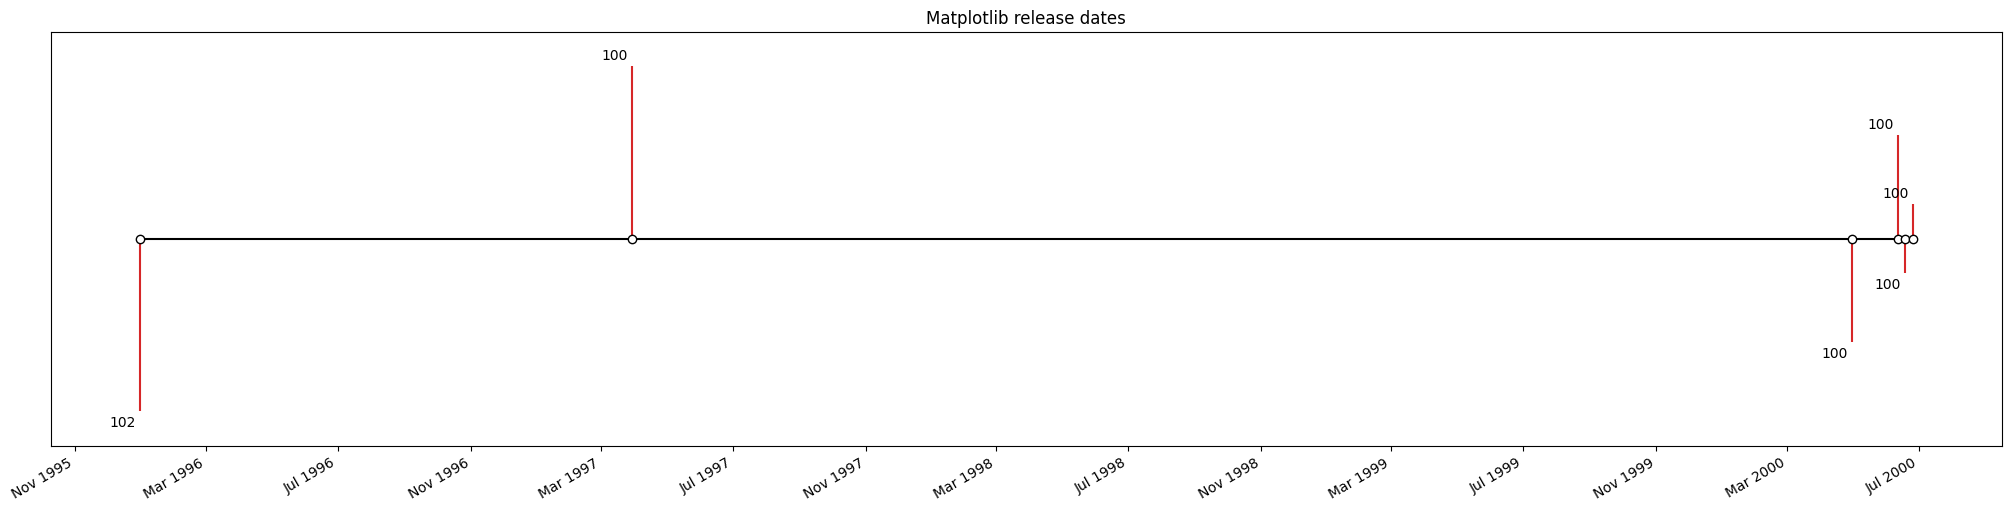

In [ ]:
from datetime import datetime
import matplotlib.dates as mdates


cats = []
labels = []
plt.figure(figsize=[13,8])

#Statistics.Capacity
names = []

dates = []
for s in shows:
  theatre = s['Show.Theatre']
  showName = s['Show.Name']
  date = s['Date.Full']
  capacity = int(s['Statistics.Capacity'])
  if ('Cats' in showName and theatre == 'Winter Garden' and capacity>99):
    cats.append([date, theatre, capacity])
    names.append(capacity)
    dates.append(date)
cats

dates = [datetime.strptime(d, "%m/%d/%Y") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 5), constrained_layout=True)
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)

ax.margins(y=0.1)
plt.show()
